In [1]:
2 * 3

6

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
# from scikit-learn.linear_model import Ridge
# from scikitlearn.linear_model import Ridge
import seaborn as sns ; sns.set()

In [3]:
# Make some data in the form of a shallow S
np.random.seed(42)
num_pts = 100
noise_range = 0.2
x_vals = []
y_vals = []
(x_left, x_right) = (-2, 2)
for i in range(num_pts):
    x = np.random.uniform(x_left, x_right)
    y = np.random.uniform(-noise_range, noise_range) + (2*math.sin(x))
    x_vals.append(x)
    y_vals.append(y)
x_column = np.reshape(x_vals, [len(x_vals), 1])

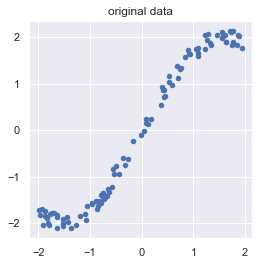

In [4]:
# Let's look at the data...
plt.figure(figsize=(4,4))
plt.scatter(x_vals, y_vals, s=20)
plt.title('original data')
plt.show()

In [5]:
# Oct 7

In [6]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
# from DLBasics_Utilities import File_Helper
# file_helper = File_Helper(save_files)

In [7]:
# Make a Ridge estimator
ridge_estimator = Ridge()

In [8]:
# Train the estimator on our data
ridge_estimator.fit(x_column, y_vals)

Ridge()

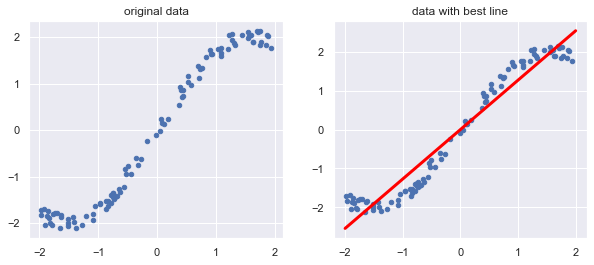

In [9]:
# Let's look at the data and the straight-line fit found by Ridge
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x_vals, y_vals, s=20)
plt.title('original data')

plt.subplot(1,2,2)
plt.scatter(x_vals, y_vals, s=20)
y_left = ridge_estimator.predict([[x_left]])
y_right = ridge_estimator.predict([[x_right]])
plt.plot([x_left, x_right], [y_left, y_right], color='#ff0000', linewidth=3)
plt.title('data with best line')

# file_helper.save_figure('ridge-demo')
plt.show()

In [10]:
# CLUSTERING

In [11]:
from sklearn.cluster import KMeans
num_clusters = 5
kMeans = KMeans(n_clusters=num_clusters)

In [12]:
#------------------------------------------------------------------------------------------------
# Bonus Chapter 1 - Notebook 2: Clusters

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns ; sns.set()

In [14]:
# make starting data
np.random.seed(42)
XY = []
for i in range(7):
    bxy, bc = make_blobs(n_samples=200, centers=1, n_features=2, cluster_std=2)
    XY.append(bxy)

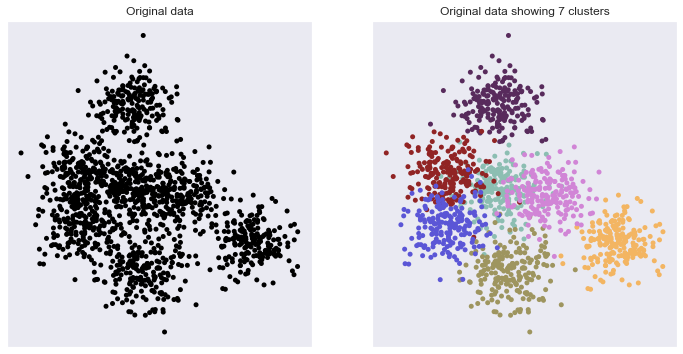

In [15]:
# show starting data. Use hand-picked colorblind-friendly colors rather than the garish defaults.
colors = ( '#582B5C', '#8CBEB2', '#9E955F', '#F3B562', '#912424',
           '#5B56D6', '#D185D6', '#408C18', '#7D3C19', '#8096BF')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for i in range(len(XY)):
    plt.scatter(XY[i][:,0], XY[i][:,1], c='black', edgecolors='none', s=25)
plt.title('Original data')
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(1,2,2)
for i in range(len(XY)):
    plt.scatter(XY[i][:,0], XY[i][:,1], c=colors[i%len(colors)], edgecolors='none', s=25)
plt.title('Original data showing '+str(len(XY))+' clusters')
plt.xticks([], [])
plt.yticks([], [])
# file_helper.save_figure('clustering-start')
plt.show()

In [16]:
# reshape input data for KMeans and scatter plots
XY_points = []
scatter_x = []
scatter_y = []
for x in XY:
    XY_points.extend(x)
    scatter_x.extend(x[:,0])
    scatter_y.extend(x[:,1])

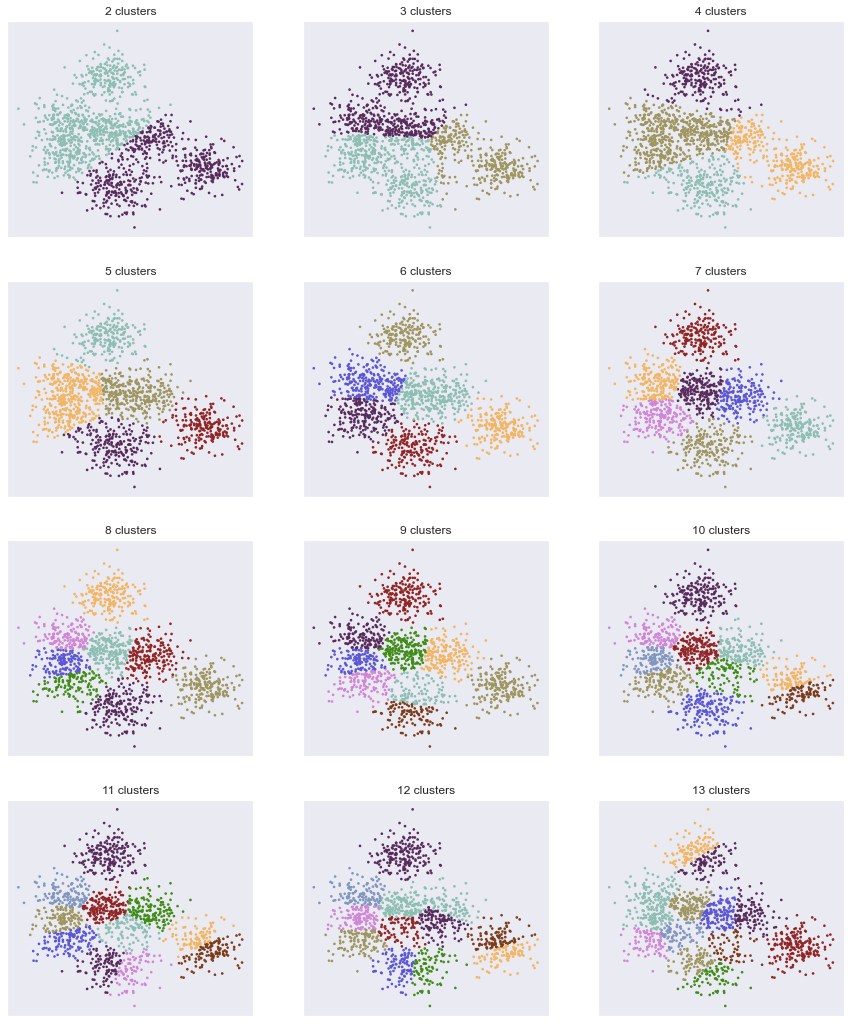

In [17]:
plt.figure(figsize=(10 + 5,10 + 5 + 3.3))
for num_clusters in range(2, 11 + 3):
    kMeans = KMeans(n_clusters=num_clusters)
    kMeans.fit(XY_points)
    predictions = kMeans.predict(XY_points)
    clrs = [colors[p%len(colors)] for p in predictions]
    plt.subplot(3 + 1, 3, num_clusters-1)
    plt.scatter(scatter_x, scatter_y, c=clrs, edgecolors='none', s=7)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title(str(num_clusters)+' clusters')
#file_helper.save_figure('clustering-fits')
plt.show()

In [18]:
#########################################################################################
# testing
#########################################################################################

# Make a File_Helper for saving and loading files.

save_files = False

# import os, sys, inspect
# current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
# from DLBasics_Utilities import File_Helper
# file_helper = File_Helper(save_files)

if save_files:
    import os, sys, inspect
    current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
    sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
    from DLBasics_Utilities import File_Helper
    file_helper = File_Helper(save_files)

In [19]:
if save_files:
    file_helper.save_figure('...')

In [20]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [21]:
np.random.seed(44)
moon_data = make_moons(n_samples=100, noise=.2)
training_samples = moon_data[0]
train_x = training_samples[:,0]
train_y = training_samples[:,1]

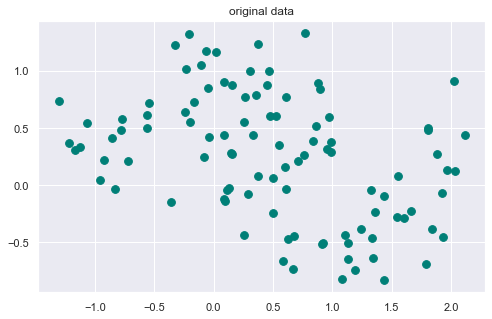

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(train_x, train_y, color='#007F77', s=60)
plt.title('original data')
#file_helper.save_figure('scaling-start')
plt.show()

In [23]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(training_samples)
transformed_training_samples = mm_scaler.transform(training_samples)

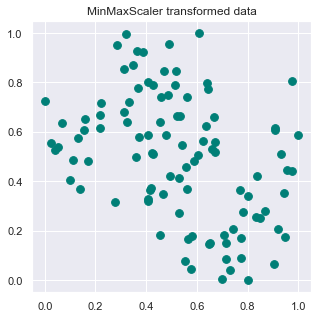

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(transformed_training_samples[:,0], transformed_training_samples[:,1], color='#007F77', s=60)
plt.title("MinMaxScaler transformed data")
#file_helper.save_figure('scaling-fits')
plt.show()

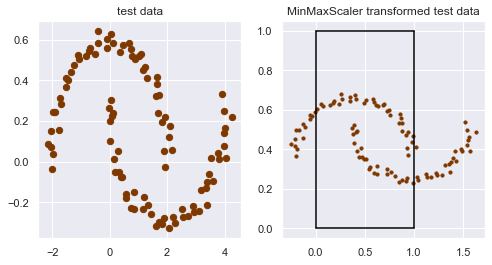

In [25]:
np.random.seed(42)
test_moon_data = make_moons(n_samples=100, noise=0.05)

test_samples = test_moon_data[0]
test_samples = np.array([[ts[0]*2, ts[1]*.6] for ts in test_samples])
test_x = test_samples[:,0]
test_y = test_samples[:,1]

transformed_test_samples = mm_scaler.transform(test_samples)

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.scatter(test_x, test_y, color='#7F3900', s=40)
plt.title('test data')

plt.subplot(1, 2, 2)
plt.scatter(transformed_test_samples[:,0], transformed_test_samples[:,1], color='#7F3900', s=10)
plt.plot([0,1], [0,0], color='black')
plt.plot([1,1], [0,1], color='black')
plt.plot([0,1], [1,1], color='black')
plt.plot([0,0], [0,1], color='black')
plt.title("MinMaxScaler transformed test data")

#file_helper.save_figure('scaling-test-pair')
plt.show()

In [26]:
np.random.seed(42)
num_pts = 100
noise_range = 0.2
sine_x_vals = []
sine_y_vals = []
(sine_x_left, sine_x_right) = (.9, 5.5)
sine_training_samples = []
for i in range(num_pts):
    x = np.random.uniform(sine_x_left, sine_x_right)
    y = np.random.uniform(-noise_range, noise_range) + (2*math.sin(x))
    sine_x_vals.append(x)
    sine_y_vals.append(y)
    
sine_samples = list(zip(sine_x_vals, sine_y_vals))

mm_scaler = MinMaxScaler()
mm_scaler.fit(sine_samples)
transformed_sine_samples = mm_scaler.transform(sine_samples)

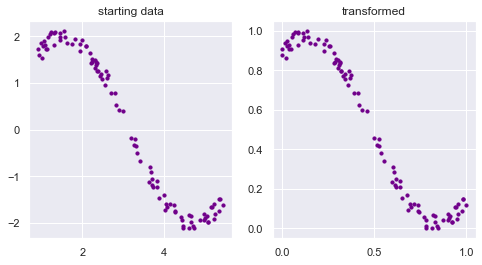

In [27]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.scatter(sine_x_vals, sine_y_vals, color='#70008A', s=10)
plt.locator_params(axis='x', nbins=4)
plt.title('starting data')

plt.subplot(1, 2, 2)
plt.scatter(transformed_sine_samples[:,0], transformed_sine_samples[:,1], color='#70008A', s=10)
plt.locator_params(axis='x', nbins=4)
plt.title("transformed")

# file_helper.save_figure('inverse-demo-1')
plt.show()

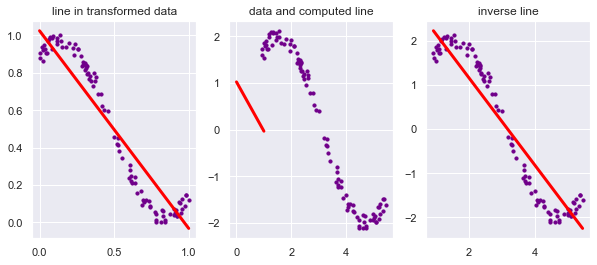

In [28]:
ridge_estimator = Ridge()
sine_x_column = np.array(transformed_sine_samples[:,0]).reshape(-1, 1)
ridge_estimator.fit(sine_x_column, transformed_sine_samples[:,1])

sine_y_left = ridge_estimator.predict([[0]])
sine_y_right = ridge_estimator.predict([[1]])

line_data = [[0, sine_y_left[0]], [1, sine_y_right[0]]]
inverse_line = mm_scaler.inverse_transform(line_data)

plt.figure(figsize=(10,4))
           
plt.subplot(1, 3, 1)
plt.scatter(transformed_sine_samples[:,0], transformed_sine_samples[:,1], color='#70008A', s=10)
plt.plot([0, 1], [sine_y_left, sine_y_right], color='#ff0000', linewidth=3)
plt.locator_params(axis='x', nbins=4)
plt.title('line in transformed data')

plt.subplot(1, 3, 2)
plt.scatter(sine_x_vals, sine_y_vals, color='#70008A', s=10)
plt.locator_params(axis='x', nbins=4)
plt.plot([0, 1], [sine_y_left, sine_y_right], color='#ff0000', linewidth=3)
plt.title('data and computed line')

plt.subplot(1, 3, 3)
plt.scatter(sine_x_vals, sine_y_vals, color='#70008A', s=10)
plt.locator_params(axis='x', nbins=4)
plt.plot(inverse_line[:,0], inverse_line[:,1], color='#ff0000', linewidth=3)
plt.title('inverse line')

# file_helper.save_figure('inverse-demo-2')
plt.show()

In [29]:
#########################################################################################
# PCA
#########################################################################################

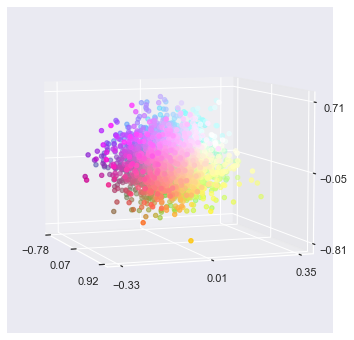

In [30]:
num_pts = 3000
blob_data = np.random.normal(loc=0, scale=.3, size=(num_pts, 3))
blob_data = np.array([[.8*bd[0], .3*bd[1], .7*bd[2]] for bd in blob_data])

colors = []
for d in blob_data:
    rval = min(1, max(0, 1.5*(d[0]+0.8)/1.6))
    gval = min(1, max(0, 1.5*(d[1]+0.3)/0.6))
    bval = min(1, max(0, 1.5*(d[2]+0.7)/1.4))
    colors.append([rval, gval, bval])

def vals_to_labels(num_ticks, data):
    values = np.linspace(np.min(data), np.max(data), 3)
    labels = [float('{:.2f}'.format(val)) for val in values]
    return labels

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -20)

ax.set_xticks(vals_to_labels(3, blob_data[:,0]))
ax.set_yticks(vals_to_labels(3, blob_data[:,1]))
ax.set_zticks(vals_to_labels(3, blob_data[:,2]))

ax.scatter(xs=blob_data[:,0], ys=blob_data[:,1], zs=blob_data[:,2], c=colors)
    
#file_helper.save_figure('PCA-start')
plt.show()

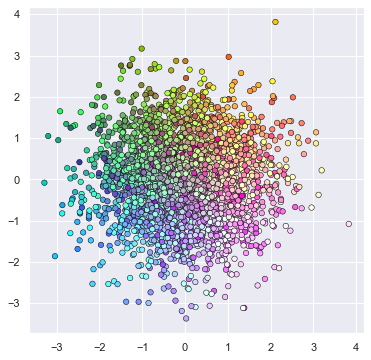

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(blob_data)
reduced_blob = pca.transform(blob_data)

plt.figure(figsize=(6,6))
plt.scatter(reduced_blob[:,0], reduced_blob[:,1], s=30, \
            linewidth=0.5, edgecolor='black', color=colors)#color='#F4C07F')
# file_helper.save_figure('PCA-result-2D')
plt.show()

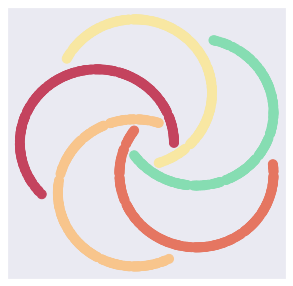

In [32]:
###########################################################################
# Ensembles
###########################################################################

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

def spiral_maker(number_of_arms, points_per_arm):
    inner_radius = 0.4
    outer_radius = 1.0
    arm_radius = (inner_radius + outer_radius)/2
    center_r = ((arm_radius*2)-inner_radius)/2
    samples = []
    labels = []
    for arm_number in range(number_of_arms):
        labels += [arm_number] * points_per_arm
        theta = (math.pi*2*arm_number)/number_of_arms
        center_x = center_r * math.cos(theta + math.pi)
        center_y = center_r * math.sin(theta + math.pi)
        for step in range(points_per_arm):
            alpha = 1.25*math.pi*step/points_per_arm
            point_x = center_x + (arm_radius * math.cos(alpha + theta))
            point_y = center_y + (arm_radius * math.sin(alpha + theta))
            samples.append([point_x, point_y])
    training_samples, test_samples, training_labels, test_labels = \
        train_test_split(samples, labels, test_size=0.33, random_state=42)

    return (np.array(training_samples), np.array(test_samples), training_labels, test_labels)

training_samples, test_samples, training_labels, test_labels = \
        spiral_maker(5, 300)
clrs = ['#C4435E', '#F8C58C', '#E57661', '#86DDB2', '#F8E7A2']
plt.rcParams['pcolor.shading']

plt.figure(figsize=(5,5))
clr_list = [clrs[i] for i in training_labels]
plt.scatter(training_samples[:,0], training_samples[:,1], s=80, c=clr_list)
plt.xticks([],[])
plt.yticks([],[])
# file_helper.save_figure('ensemble-starting-data')
plt.show()

In [33]:
def show_predictions(ensemble, filename):
    plt.figure(figsize=(8,3))
    ensemble.fit(training_samples, training_labels)
    predicted_classes = ensemble.predict(test_samples)
    
    clr_list = [clrs[i] for i in predicted_classes]
    custom_cmap = ListedColormap(clrs, name='custom_colormap')

    plt.subplot(1, 3, 1)
    plt.scatter(test_samples[:,0], test_samples[:,1], c=clr_list, s=80)
    plt.xticks([],[])
    plt.yticks([],[])
    
    plt.subplot(1, 3, 2)
    side_size = 400 
    xy_limit = 1.5
    x = np.linspace(-xy_limit, xy_limit, side_size) 
    y = np.linspace(-xy_limit, xy_limit, side_size) 
    X, Y = np.meshgrid(x, y) 
    xy_samples = [[px, py] for px in x for py in y]  
    predictions = ensemble.predict(xy_samples)
    predictions = predictions.reshape((side_size, side_size))
    predictions = predictions.T   # because pcolormesh wants transpose
    plt.pcolormesh(X, Y, predictions, cmap=custom_cmap, shading='auto') 
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xticks([],[])
    plt.yticks([],[])

    
    plt.subplot(1, 3, 3)
    side_size = 400 
    xy_limit = 1.5
    x = np.linspace(-xy_limit, xy_limit, side_size) 
    y = np.linspace(-xy_limit, xy_limit, side_size) 
    X, Y = np.meshgrid(x, y) 
    xy_samples = [[px, py] for px in x for py in y]  
    predictions = ensemble.predict(xy_samples)
    predictions = predictions.reshape((side_size, side_size))
    predictions = predictions.T   # because pcolormesh wants transpose
    plt.pcolormesh(X, Y, predictions, cmap=custom_cmap, shading='auto') 
    plt.scatter(test_samples[:,0], test_samples[:,1], facecolors='none', s=80, edgecolors='black', lw=0.5)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xticks([],[])
    plt.yticks([],[])

    plt.tight_layout()
    # file_helper.save_figure(filename)
    plt.show()

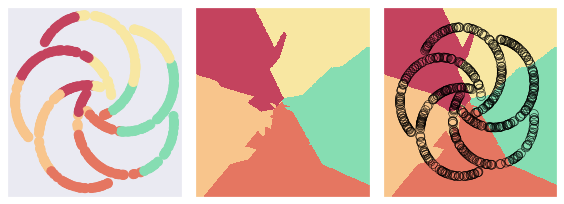

In [34]:
ridge_ensemble = AdaBoostClassifier(RidgeClassifier(), algorithm='SAMME')
show_predictions(ridge_ensemble, 'ensemble-ridge')

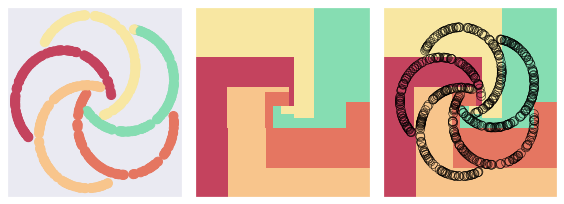

In [35]:
tree_ensemble = AdaBoostClassifier(DecisionTreeClassifier())
show_predictions(tree_ensemble, 'ensemble-tree')

In [36]:
###########################################################################
# Automation
###########################################################################

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import math
import seaborn as sns ; sns.set()

In [38]:
ridge_model = RidgeClassifier()
parameter_dictionary = {
    'alpha': (1, 2, 3, 5, 10, 20),
    'solver': ('svd', 'lsqr', 'sag')
}
num_folds = 3

searcher = GridSearchCV(estimator=ridge_model, 
                        param_grid=parameter_dictionary, 
                        cv=num_folds, return_train_score=True)

In [39]:
np.random.seed(42)
moon_data = make_moons(n_samples=300, noise=.1)
training_samples = moon_data[0]
training_labels = moon_data[1]
train_x = training_samples[:,0]
train_y = training_samples[:,1]

In [40]:
searcher.fit(training_samples, training_labels)

GridSearchCV(cv=3, estimator=RidgeClassifier(),
             param_grid={'alpha': (1, 2, 3, 5, 10, 20),
                         'solver': ('svd', 'lsqr', 'sag')},
             return_train_score=True)

In [41]:
print('Best estimator: {}\nBest score: {:.2f}\nBest parameters: {}'.format(
        searcher.best_estimator_, searcher.best_score_, searcher.best_params_))

Best estimator: RidgeClassifier(alpha=2, solver='svd')
Best score: 0.87
Best parameters: {'alpha': 2, 'solver': 'svd'}


In [42]:
num_test_samples = 1000
test_samples_x = np.random.uniform(low=-1.5, high=2.5, size=num_test_samples)
test_samples_y = np.random.uniform(low=-1.0, high=1.5, size=num_test_samples)
test_samples = list(zip(test_samples_x, test_samples_y))

In [43]:
predictions = searcher.predict(test_samples)

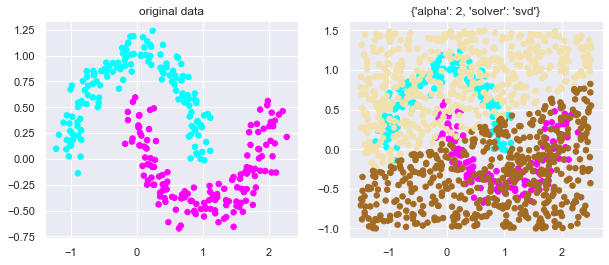

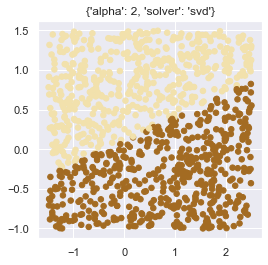

In [44]:
original_cmap = 'cool'
from matplotlib.colors import LinearSegmentedColormap

solved_map = LinearSegmentedColormap.from_list('mycmap', ['#F2E1AC', '#A36B22'])
solved_3D_map = LinearSegmentedColormap.from_list('mycmap', ['#FDF4E1', '#A8BCE3'])

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.scatter(train_x, train_y, c=training_labels, s=30, cmap=original_cmap)
plt.title('original data')

plt.subplot(1, 2, 2)
plt.scatter(train_x, train_y, c=training_labels, s=30, cmap=original_cmap)
plt.scatter(test_samples_x, test_samples_y, c=predictions, s=30, cmap=solved_map)
plt.title(searcher.best_params_)
# file_helper.save_figure('Grid-search-results')

plt.show()

plt.figure(figsize=(4,4))
plt.scatter(test_samples_x, test_samples_y, c=predictions, s=30, cmap=solved_map)
plt.title(searcher.best_params_)
# file_helper.save_figure('Grid-search-only-results')
plt.show()

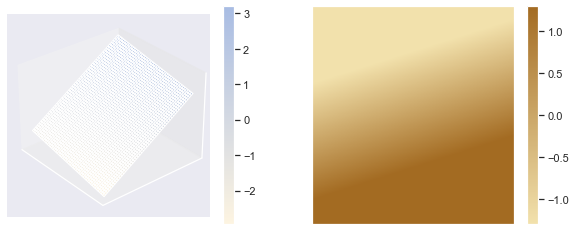

In [45]:
side_size = 400 

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
xy_limit = 2
x = np.linspace(-xy_limit, xy_limit, side_size) 
y = np.linspace(-xy_limit, xy_limit, side_size) 
X, Y = np.meshgrid(x, y) 
xy_samples = [[px, py] for px in x for py in y]  
decisions = searcher.decision_function(xy_samples)
z_limit = 1.3
#decisions = np.array([min(z_limit, max(-z_limit, p)) for p in decisions])
decisions = decisions.reshape((side_size, side_size))
decisions = decisions.T   # because pcolormesh wants transpose
p = ax.plot_surface(X, Y, decisions, cmap=solved_3D_map)
ax.view_init(30, 140)
plt.xticks([], [])
plt.yticks([], [])
ax.set_zticks([])
labels_ticks = np.linspace(-xy_limit, xy_limit, 3)
labels_labels = [float('{:.2f}'.format(xv)) for xv in labels_ticks]
fig.colorbar(p)

ax = fig.add_subplot(1, 2, 2)
xy_limit = 2
x = np.linspace(xy_limit, -xy_limit, side_size) 
y = np.linspace(-xy_limit, xy_limit, side_size) 
X, Y = np.meshgrid(x, y) 
xy_samples = [[px, py] for px in x for py in y]  
decisions = searcher.decision_function(xy_samples)
z_limit = 1.3
decisions = np.array([min(z_limit, max(-z_limit, p)) for p in decisions])
decisions = decisions.reshape((side_size, side_size))
decisions = decisions.T   # because pcolormesh wants transpose
p = plt.pcolormesh(X, Y, decisions, cmap=solved_map, shading='auto')  
fig.colorbar(p)
plt.xticks([], [])
plt.yticks([], [])
# file_helper.save_figure('decision-surface-linear')

plt.show()

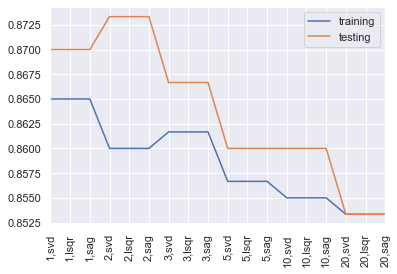

In [46]:
plt.plot(searcher.cv_results_['mean_train_score'], label='training')
plt.plot(searcher.cv_results_['mean_test_score'], label='testing')
plt.legend(loc='upper right')
plt.xlim(0, 17)
x_label_locations = np.arange(0, 18)
x_label_values = [str(p['alpha'])+','+str(p['solver']) for p in searcher.cv_results_['params']]
plt.xticks(x_label_locations, x_label_values, rotation='vertical')
# file_helper.save_figure('Grid-search-results-graph')
plt.show()

In [47]:
######################################
# Pipelines
######################################

In [55]:
np.random.seed(42)

pipe_polynomial_features = PolynomialFeatures()
pipe_ridge_classifier = RidgeClassifier()
pipeline = Pipeline([('poly', pipe_polynomial_features),
                     ('ridge', pipe_ridge_classifier)])

pipe_parameter_dictionary = {
#    'poly__degree': (0, 1, 2, 3, 4, 5),  # in file on GitHub
    'poly__degree': (0, 1, 2, 3, 4, 5, 6),  # in book PDF
    'ridge__alpha': (.25, .5, 1, 2 )
}
pipe_num_folds = 3

pipe_searcher = GridSearchCV(estimator=pipeline, 
                             param_grid=pipe_parameter_dictionary, 
                             cv=num_folds, return_train_score=True)

# this line gets error:
# pipe_searcher.fit(training_samples, training_labels)

# print('Best estimator: {}\nBest score: {:.2f}\nBest parameters: {}'.format(
#        pipe_searcher.best_estimator_, pipe_searcher.best_score_, pipe_searcher.best_params_))